In [1]:
import os
import tensorflow as tf
import pandas as pd

tf.__version__


'2.13.0'

In [2]:
main_dir = r"F:\linux_ubuntu_codes\codes\nlp_lecture"

In [3]:
train_dir = os.path.join(main_dir + r"\train.csv")
test_dir = os.path.join(main_dir + r"\test.csv")

'https://raw.githubusercontent.com/sedeba19/NLP--Random-Models/main/train.csv'

In [4]:
train_dir

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
# Make a train_df
train_df = pd.read_csv(train_dir)
test_df = pd.read_csv(test_dir)
train_df.head()

,id,keyword,location,text,target
3228,4632,emergency%20services,"Sydney, New South Wales",Goulburn man Henry Van Bilsen missing: Emergen...,1
3706,5271,fear,NaN,The things we fear most in organizations--fluc...,0
6957,9982,tsunami,Land Of The Kings,@tsunami_esh ?? hey Esh,0
2887,4149,drown,NaN,@POTUS you until you drown by water entering t...,0
7464,10680,wounds,"cody, austin follows ?*?",Crawling in my skin\nThese wounds they will no...,1


In [6]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac = 1, random_state = 1)
train_df_shuffled.head()

(7613, 5)

In [7]:
train_df_shuffled.shape

target
0    4342
1    3271
Name: count, dtype: int64

In [8]:
# How many examples of each class?
train_df['target'].value_counts()

(7613, 3263)

In [9]:
# How many total samples?
len(train_df), len(test_df)

Target:0 (not a real disaster)
Text: 
Yup. Still hasn't sunk in. ?? https://t.co/Ii2SpVP89b
-----

Target:0 (not a real disaster)
Text: 
@Hail_Zel man you kno I'm there !
-----

Target:0 (not a real disaster)
Text: 
@Chrisman528 fatality ...
-----

Target:0 (not a real disaster)
Text: 
@Marvel @DCComics @ImageComics @DarkHorseComics @IDWPublishing And by doing this you're enabling the possible collapse of the industry.
-----

Target:0 (not a real disaster)
Text: 
If u faved that I hope you fall off a cliff ??
-----


In [ ]:
# Visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[["text", "target"]][random_index: random_index +5].itertuples():
    _, text, target = row
    if target > 0:
        print(f"Target:{target}", "(real disaster)")
    else:
        print(f"Target:{target}", "(not a real disaster)")
    
    print(f"Text: \n{text}")
    print("-----\n")

### Split data into training and validation sets

In [11]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df['text'],
                                                                            train_df['target'],
                                                                            test_size = 0.1,
                                                                            random_state = 42)

(7613,)

In [12]:
train_df['text'].shape

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [13]:
train_df["text"]

array(['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
       'Forest fire near La Ronge Sask. Canada',
       "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
       ...,
       'M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ',
       'Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.',
       'The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d'],
      dtype=object)

In [14]:
train_df['text'].to_numpy()

array(['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
       'Forest fire near La Ronge Sask. Canada',
       "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
       ...,
       'M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ',
       'Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.',
       'The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d'],
      dtype=object)

In [15]:
train_df['text'].to_numpy()

(6851, 762, 6851, 762)

In [ ]:
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

### Converting text into numbers: Text Vectorization also known as Tokenization

In [17]:
# Get the total words
total_words = 0
for i in train_sentences:
    total_words += len(i.split())

total_words

(6851,)

In [18]:
train_sentences.shape

15

In [19]:
# Get the average words per sentence or line
avg_words_per_sentence = round(total_words/len(train_sentences))
avg_words_per_sentence

In [20]:
# Normally, total number of words is equal or less than the max vocabulary length
max_vocab_length = 10000

# max length of a statement is equal or more than the average word per sentence or line
max_length = 15

In [21]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_mode = "int",
                                    output_sequence_length = max_length)

# Fit the text vectorizer to the training set
text_vectorizer.adapt(train_sentences)

There's a flood in my street! Sentence length is 29.


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[282,   3, 206,   4,  13, 674,   0,   0,   0,   0,   0,   0,   0,
          0,   0]], dtype=int64)>

In [22]:
# Create a sample sentence and tokenize it
samp_sentence = "There's a flood in my street!"
print(samp_sentence, f"Sentence length is {len(samp_sentence)}.")
text_vectorizer([samp_sentence])
#len(tf.squeeze(text_vectorizer([samp_sentence])))

Original text: 

 Photoshop Tools Crash Course - Complete Photoshop Tool Guide http://t.co/DunMvj7ITl #course http://t.co/RgdrJv63hF 

Vectorized text:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[2813, 3309,   83,  814, 1313, 2813, 3310, 1193,    1,  814,    1,
           0,    0,    0,    0]], dtype=int64)>

In [23]:
# Choose random sentence from the training dataset and tokenize it
rand_train_sentence = random.choice(train_sentences)
print(f"Original text: \n\n {rand_train_sentence} \n\nVectorized text:")
text_vectorizer([rand_train_sentence])

['',
 '[UNK]',
 'the',
 'a',
 'in',
 'to',
 'of',
 'and',
 'i',
 'is',
 'for',
 'on',
 'you',
 'my',
 'with',
 'it',
 'that',
 'at',
 'by',
 'this',
 'from',
 'are',
 'be',
 'was',
 'have',
 'like',
 'as',
 'me',
 'but',
 'up',
 'just',
 'so',
 'im',
 'not',
 'amp',
 'your',
 'out',
 'all',
 'after',
 'its',
 'has',
 'no',
 'will',
 'an',
 'fire',
 'when',
 'if',
 'we',
 'get',
 'now',
 'more',
 'via',
 'new',
 'about',
 'what',
 'people',
 'or',
 'news',
 'he',
 'they',
 'over',
 'one',
 'been',
 'how',
 'dont',
 'who',
 'video',
 'into',
 'were',
 'do',
 'us',
 'can',
 'emergency',
 '2',
 'disaster',
 'there',
 'her',
 'some',
 'than',
 'still',
 'would',
 'his',
 'police',
 'crash',
 'burning',
 'suicide',
 'body',
 'california',
 'back',
 'time',
 'buildings',
 'had',
 'why',
 'off',
 'them',
 'got',
 'man',
 'see',
 'storm',
 'know',
 'going',
 'cant',
 'world',
 'first',
 'day',
 'rt',
 'nuclear',
 'love',
 'youtube',
 'our',
 'attack',
 'go',
 'fires',
 'two',
 'their',
 'bomb',

In [24]:
# Get unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
words_in_vocab

10000

In [25]:
len(words_in_vocab)

['', '[UNK]', 'the', 'a', 'in']

In [26]:
# Top 5 words in words_in_vocab
words_in_vocab[:5]

['pakthey', 'pakistan\x89Ûªs', 'pakistans', 'pajamas', 'paints']

In [ ]:
# Least 5 words in words_in_vocab
words_in_vocab[-5:]

### Embedding layer

To make our embedding, we are going to use TensorFlow’s embedding layer: https://www.tensorflow.org/api/docs/python/tf/keras/layers/

The parameters are below mostly used.
* input_dim = size of the vocabulary
* output_dim = size of the output embedding vector.  For example, a value of 100 would mean each token gets represented by a vector 100 long
* input_length = length of the sequences being passed to the embedding layer

In [28]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 64,
                             embeddings_initializer = "uniform",
                             input_length = max_length)

Original text: Unexercised honda run-down neighborhood desolate: PSqD

Vectorized text: [[7157    1 8901 5017  810 9496    0    0    0    0    0    0    0    0
     0]]

Vectorized text shape: (1, 15)
Embbedded text: [[[ 0.03954208 -0.00906303  0.0358311  -0.03250655 -0.0203532
    0.02918584 -0.01683151  0.04723224 -0.01014956  0.02778825
   -0.02821407  0.00629053 -0.00205172  0.03607379  0.02951149
   -0.03334422  0.04834897  0.01056667 -0.02310643 -0.02656921
   -0.03248167  0.01823873 -0.04841439 -0.01162243  0.01940234
   -0.00234748 -0.03038628 -0.02699078  0.04427967 -0.04945989
   -0.0108095  -0.01006279 -0.00655333 -0.03340288 -0.01785406
   -0.03297236  0.04680781  0.01729455 -0.02172616 -0.00215075
   -0.0019959  -0.02527705 -0.00857097 -0.03832333  0.00094484
   -0.0309817   0.0211432   0.0461706  -0.03237112 -0.03090276
   -0.01525937  0.02526779 -0.0459983   0.01675249  0.00051341
    0.04981713 -0.00618268 -0.01221802  0.00580322 -0.02632275
    0.04599264 -0.03696167  

In [ ]:
# Get a random sentence from the training set and return Original text, Vectorized text, Embedded text
rand_sentence = random.choice(train_sentences)
print(f"Original text: {rand_sentence}\n")
print(f"Vectorized text: {text_vectorizer([rand_sentence])}\n")
print(f"Vectorized text shape: {text_vectorizer([rand_sentence]).shape}")
print(f"Embbedded text: {embedding(text_vectorizer([rand_sentence]))}")
print(f"Embedded text shape: {embedding(text_vectorizer([rand_sentence])).shape}")

### Model_5: 1D Convolutional Neural Network (CNN)

In [30]:
from tensorflow.keras import layers
embedding_test = embedding(text_vectorizer(['I am so Great!']))

conv1d_test = layers.Conv1D(filters = 32,
                            kernel_size = 5,
                            activation = 'relu',
                            padding = 'valid')
conv1d_test_output = conv1d_test(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv1d_test_output)


<tf.Tensor: shape=(1, 15, 64), dtype=float32, numpy=
array([[[ 0.02944398,  0.00489888, -0.00865203,  0.04160129,
          0.03292748, -0.00302891,  0.01191509,  0.02758639,
          0.0024    , -0.0390545 , -0.03541434, -0.03853422,
          0.02460264,  0.02988312, -0.02399306,  0.0448527 ,
          0.01541921, -0.03120065, -0.03002771,  0.01832977,
         -0.03769577,  0.02570568,  0.03571823, -0.02889425,
         -0.03649337,  0.01997291,  0.04681268,  0.01441692,
          0.02783174,  0.03623151,  0.03497573, -0.01722412,
         -0.01218855,  0.01378182, -0.0487034 ,  0.03144332,
         -0.00137857,  0.01347741,  0.03099306, -0.02523078,
          0.02952844, -0.04367404,  0.02778388,  0.04756759,
          0.01419206, -0.0133736 , -0.0313712 , -0.0121644 ,
          0.0149391 ,  0.0337469 , -0.00175282, -0.03318538,
          0.02038251,  0.00736906,  0.03563021,  0.02409535,
          0.04250706, -0.00164073, -0.03784493, -0.04228747,
          0.03235472, -0.0271255

In [31]:
embedding_test

<tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
array([[[0.        , 0.0139761 , 0.05262497, 0.        , 0.        ,
         0.03604408, 0.06941138, 0.        , 0.02259907, 0.        ,
         0.03161886, 0.        , 0.        , 0.        , 0.        ,
         0.08338557, 0.        , 0.02944628, 0.        , 0.        ,
         0.03005233, 0.02937646, 0.        , 0.00795283, 0.01799398,
         0.        , 0.00745637, 0.01667655, 0.00750625, 0.        ,
         0.0131709 , 0.03693104],
        [0.        , 0.02154433, 0.        , 0.03006318, 0.        ,
         0.01819672, 0.00470722, 0.        , 0.00549361, 0.        ,
         0.01185598, 0.02954535, 0.01763827, 0.        , 0.        ,
         0.0641825 , 0.        , 0.01695142, 0.01077332, 0.03234139,
         0.        , 0.03676404, 0.02329819, 0.        , 0.        ,
         0.00897252, 0.03186498, 0.04880847, 0.02327843, 0.0531072 ,
         0.04831859, 0.03898305],
        [0.00397486, 0.03934273, 0.02202147, 0.0097

In [32]:
conv1d_test_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.00397486, 0.0532314 , 0.05262497, 0.03006318, 0.        ,
        0.03604408, 0.06941138, 0.00802599, 0.03526242, 0.        ,
        0.05995692, 0.0383713 , 0.07534431, 0.        , 0.01399539,
        0.08338557, 0.        , 0.05466391, 0.02021868, 0.03234139,
        0.03005233, 0.06209438, 0.03931392, 0.03363157, 0.01799398,
        0.01912928, 0.03186498, 0.04880847, 0.07978338, 0.0531072 ,
        0.04831859, 0.04028387]], dtype=float32)>

In [33]:
max_pool_output

(TensorShape([1, 15, 64]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [34]:
embedding_test.shape, conv1d_test_output.shape, max_pool_output.shape

In [35]:
from tensorflow.keras import layers

inputs = layers.Input(shape = (1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters = 64,
                  kernel_size = 5,
                  strides = 1,
                  activation = 'relu',
                  padding = 'valid')(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_5 = tf.keras.Model(inputs, outputs, name = 'model_5_conv1d')

# Compile the model
model_5.compile(loss = 'binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

Epoch 1/5
215/215 [==============================] - 2s 5ms/step - loss: 0.5693 - accuracy: 0.7069 - val_loss: 0.4810 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 1s 4ms/step - loss: 0.3449 - accuracy: 0.8571 - val_loss: 0.5101 - val_accuracy: 0.7703
Epoch 3/5
215/215 [==============================] - 1s 4ms/step - loss: 0.2225 - accuracy: 0.9190 - val_loss: 0.5971 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 1s 4ms/step - loss: 0.1477 - accuracy: 0.9499 - val_loss: 0.6843 - val_accuracy: 0.7677
Epoch 5/5
215/215 [==============================] - 1s 4ms/step - loss: 0.1037 - accuracy: 0.9638 - val_loss: 0.7610 - val_accuracy: 0.7638


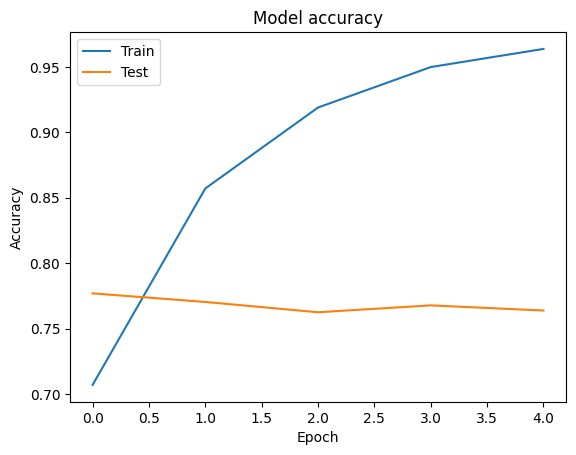

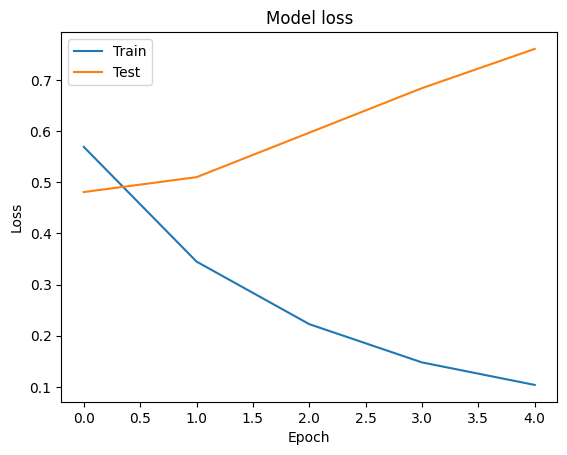

In [36]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data=(val_sentences, val_labels))

In [37]:
import matplotlib.pyplot as plt

plt.plot(model_5_history.history['accuracy'])
plt.plot(model_5_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_5_history.history['loss'])
plt.plot(model_5_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

24/24 [==============================] - 0s 1ms/step


array([[9.78874136e-03],
       [9.78205502e-02],
       [4.50776219e-02],
       [8.45881924e-03],
       [2.05036178e-02],
       [1.28888696e-01],
       [4.33024578e-03],
       [1.64016783e-02],
       [2.35649385e-02],
       [9.99237001e-01],
       [8.22593927e-01],
       [2.37589777e-01],
       [1.82175394e-02],
       [5.61767556e-02],
       [5.27829975e-02],
       [2.05807194e-01],
       [9.95584428e-01],
       [1.38231125e-02],
       [9.99950707e-01],
       [7.14173366e-04],
       [3.72872442e-01],
       [5.33574998e-01],
       [2.26361871e-01],
       [4.23478067e-01],
       [6.69989347e-01],
       [5.99735323e-03],
       [9.99789536e-01],
       [9.28759277e-01],
       [9.99878824e-01],
       [3.71256261e-04],
       [5.12193404e-02],
       [9.43278195e-04],
       [9.43999112e-01],
       [5.38883150e-01],
       [8.24777186e-01],
       [7.13460088e-01],
       [1.48156762e-01],
       [1.08816763e-02],
       [2.09217367e-04],
       [1.28158823e-01],


In [38]:
# Make some predictions with our model_5 Conv1D
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>

In [39]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:5]

In [40]:
# Evaluate the model by comparing the model_5_preds to val_labels
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

model_5_accuracy_score = accuracy_score(val_labels, model_5_preds)
model_5_precision, model_5_recall, model_5_fscore, _ =precision_recall_fscore_support(val_labels,
                                                                                      model_5_preds, average="weighted")

{'model_5_accuracy_score': 0.7637795275590551,
 'model_5_precision': 0.7642849418077561,
 'model_5_recall': {0.7637795275590551},
 'model_5_f1score': {0.7611506908904366}}

In [ ]:
dict_result = {"model_5_accuracy_score": model_5_accuracy_score,
               "model_5_precision": model_5_precision,
               "model_5_recall": {model_5_recall},
               "model_5_f1score": {model_5_fscore}}
dict_result